In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction - Diffusion coefficent for 1D random step random walker

As we computed in the RandomWalk.ipynb, the diffusion constant in the case of random walker with constant step size is 0.5

But what about the random step size? in this code we will figure that out.

The step size at each iteration will be a random number in range [-1,1]

In [26]:
def runRandomWalker(nSteps, returnFullArray=False):
    if returnFullArray==False:
        position = 0
        for i in range(nSteps):
            step = 2*np.random.random()-1
            position+=step


        return position
    
    else:
        positionList = np.zeros(nSteps)
        position = 0
        for i in range(nSteps):
            step  = 2*np.random.random()-1
            position+=step
            positionList[i] = position
            
        return positionList
    
    
    
def runRandomWalkerEnsemble(nSteps, nEnsemble):
    endPoints = np.zeros(nEnsemble)
    for i in range(nEnsemble):
        endPoints[i] = runRandomWalker(nSteps)
        
    return endPoints
        
        
    

#### Demonstrating the individual Random Walkers

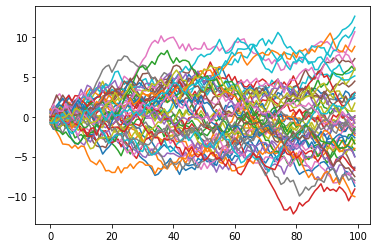

In [24]:
for i in range(50):
    position = runRandomWalker(100, returnFullArray=True)
    plt.plot(position)

## Calculating the statistics of endpoints of RandomWalker

In [29]:
endPoints = runRandomWalkerEnsemble(100,50)

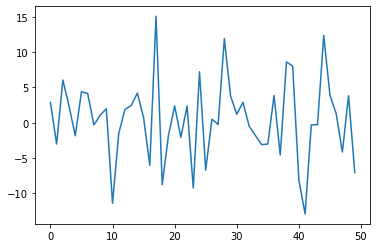

In [30]:
plt.plot(endPoints)

In [34]:
print("mean is: {} ".format(endPoints.mean()))

mean is: 0.4411535444732384 


In [35]:
print("variance is: {}".format(endPoints.var()))

variance is: 32.83806898986319


#### Now to capture the dynamics, we need to calculate the end points for different step sizes:

In [58]:
stepSizeRange = np.arange(1,100)
nEnsemble = 100
endPoints_var = np.zeros(stepSizeRange.shape[0])


for stepSize in stepSizeRange:
    endPoints = runRandomWalkerEnsemble(stepSize,nEnsemble)
    endPoints_var[stepSize-1] = endPoints.var()
    

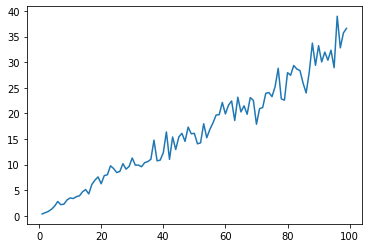

In [59]:
plt.plot(stepSizeRange,endPoints_var)

In [74]:
a,b = np.polyfit(stepSizeRange, endPoints_var,1)

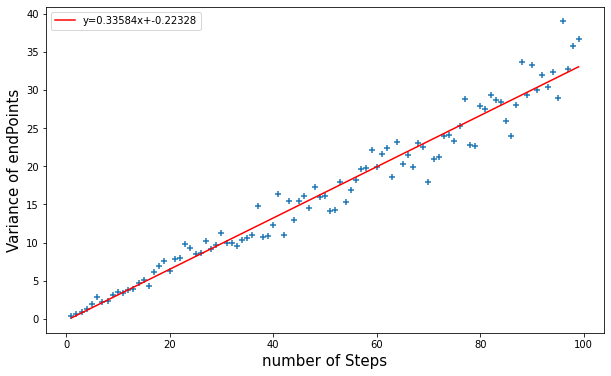

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(stepSizeRange,endPoints_var,marker='+')
plt.plot([stepSizeRange[0], stepSizeRange[-1]],[a*stepSizeRange[0]+b, a*stepSizeRange[-1]+b],label=f"y={a:2.5f}x+{b:2.5f}", color='r')
plt.xlabel("number of Steps",fontsize=15)
plt.ylabel("Variance of endPoints",fontsize=15)
plt.legend()


$\sigma ^2 = 2D n$

in which n is the number of steps

So the value of D will be equalt to a/2 = 0.167921932

Recall that the value of D for random walker with constant step size was 0.5. So the random step random walker diffuses slower than the regular randomwalker

In [94]:
## For tests